In [1]:
!pip install --pre deepchem

     |████████████████████████████████| 608 kB 9.0 MB/s 
     |████████████████████████████████| 20.6 MB 1.5 MB/s 


# PART 1: molnet bace dataset

Text(0.5, 1.0, 'Molnet_BACE1_Class')

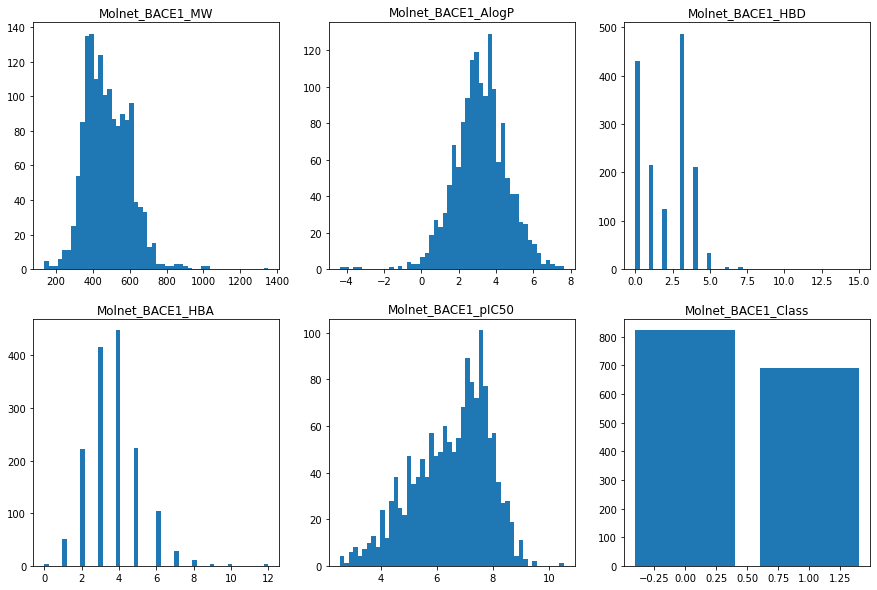

In [6]:
# data plotting: before split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import deepchem as dc

data = pd.read_csv('molnet_bace.csv')
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,3,1)
ax1.hist(data['MW'], bins=50)
plt.title('Molnet_BACE1_MW')

ax1=fig.add_subplot(2,3,2)
ax1.hist(data['AlogP'], bins=50)
plt.title('Molnet_BACE1_AlogP')

ax1=fig.add_subplot(2,3,3)
ax1.hist(data['HBD'], bins=50)
plt.title('Molnet_BACE1_HBD')

ax1=fig.add_subplot(2,3,4)
ax1.hist(data['HBA'], bins=50)
plt.title('Molnet_BACE1_HBA')

ax1=fig.add_subplot(2,3,5)
ax1.hist(data['pIC50'], bins=50)
plt.title('Molnet_BACE1_pIC50')

ax1=fig.add_subplot(2,3,6)
counts = data['Class'].value_counts()
ax1.bar(counts.index, counts.values)
plt.title('Molnet_BACE1_Class')


In [7]:
# pandas read file
original_data = pd.read_csv('molnet_bace.csv')
original_data_sub = original_data[['mol', 'CID', 'Class', 'pIC50']]
# deepchem read file
input_data='molnet_bace.csv'
tasks=['Class']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, feature_field='mol',featurizer=featurizer)
dataset=loader.create_dataset(input_data)
# splitters
randomSplitter = dc.splits.RandomSplitter()
scaffoldsplitter = dc.splits.ScaffoldSplitter()
butinaSplitter = dc.splits.ButinaSplitter()
splitters = [randomSplitter, scaffoldsplitter, butinaSplitter]
for splitter in splitters:
  # split data
  train_dataset, test_dataset = splitter.train_test_split(dataset)
  # train data get smiles
  train_dataset_df = train_dataset.to_dataframe()
  train_dataset_df_sub = train_dataset_df[['ids']]
  train_dataset_df_sub.columns = ['smiles']
  # train data merge
  merged_train_data = pd.merge(train_dataset_df_sub, original_data_sub, how='inner', left_on='smiles', right_on='mol', left_index=False, right_index=False)
  merged_train_data.to_csv('molnet_bace1_train_'+ str(splitter) + '.csv', index=False)
  # test data get smiles
  test_dataset_df = test_dataset.to_dataframe()
  test_dataset_df_sub = test_dataset_df[['ids']]
  test_dataset_df_sub.columns = ['smiles']
  # test data merge
  merged_test_data = pd.merge(test_dataset_df_sub, original_data_sub, how='inner', left_on='smiles', right_on='mol', left_index=False, right_index=False)
  merged_test_data.to_csv('molnet_bace1_test_'+ str(splitter) + '.csv', index=False)



In [9]:
from google.colab import files
files.download('molnet_bace1_test_ButinaSplitter.csv')
files.download('molnet_bace1_test_RandomSplitter.csv')
files.download('molnet_bace1_test_ScaffoldSplitter.csv')
files.download('molnet_bace1_train_ButinaSplitter.csv')
files.download('molnet_bace1_train_RandomSplitter.csv')
files.download('molnet_bace1_train_ScaffoldSplitter.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

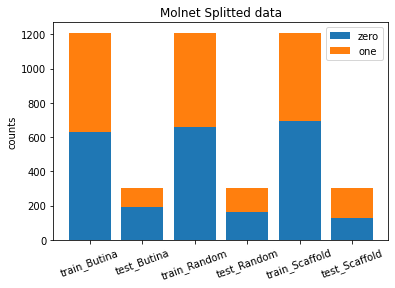

In [18]:
# data plotting: after split
test_Butina = pd.read_csv('molnet_bace1_test_ButinaSplitter.csv')
test_Random = pd.read_csv('molnet_bace1_test_RandomSplitter.csv')
test_Scaffold = pd.read_csv('molnet_bace1_test_ScaffoldSplitter.csv')
train_Butina = pd.read_csv('molnet_bace1_train_ButinaSplitter.csv')
train_Random = pd.read_csv('molnet_bace1_train_RandomSplitter.csv')
train_Scaffold = pd.read_csv('molnet_bace1_train_ScaffoldSplitter.csv')

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=20)

labels = ['train_Butina', 'test_Butina', 'train_Random', 'test_Random', 'train_Scaffold', 'test_Scaffold'] 
zero_class = [train_Butina['Class'].value_counts()[0], test_Butina['Class'].value_counts()[0], train_Random['Class'].value_counts()[0], test_Random['Class'].value_counts()[0], train_Scaffold['Class'].value_counts()[0], test_Scaffold['Class'].value_counts()[0]]
one_class = [train_Butina['Class'].value_counts()[1], test_Butina['Class'].value_counts()[1], train_Random['Class'].value_counts()[1], test_Random['Class'].value_counts()[1], train_Scaffold['Class'].value_counts()[1], test_Scaffold['Class'].value_counts()[1]]

ax.bar(labels, zero_class,label='zero')
ax.bar(labels, one_class, bottom=zero_class, label='one')

ax.set_ylabel('counts')
ax.set_title('Molnet Splitted data')
ax.legend()

plt.show()


# PART 2: chembl bace dataset

In [20]:
data = pd.read_csv('chembl_bace_bioactivity_data_processed.csv')
data.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_type',
       'standard_relation', 'standard_value', 'standard_units', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'pIC50', 'Classification'],
      dtype='object')

Text(0.5, 1.0, 'chembl_bace_Class')

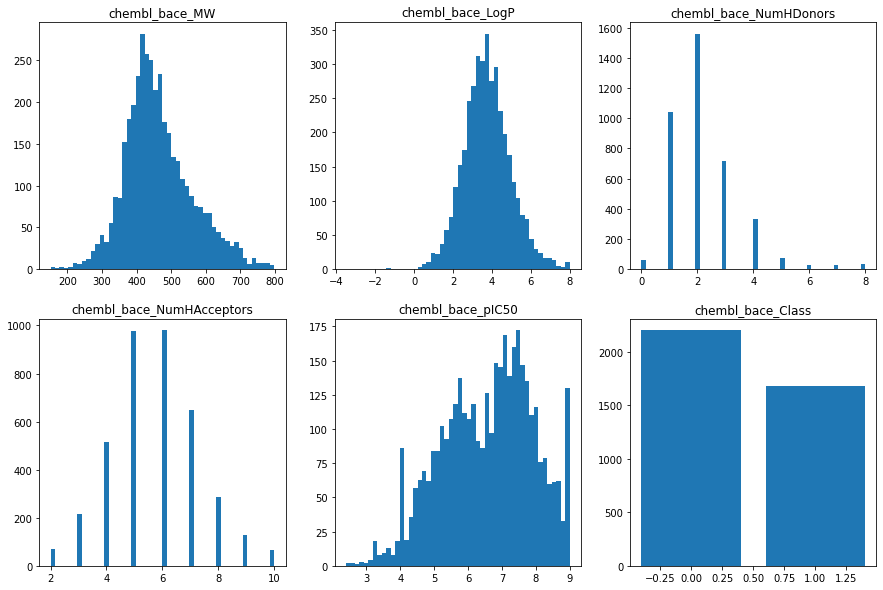

In [22]:
# data plotting: before split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import deepchem as dc

data = pd.read_csv('chembl_bace_bioactivity_data_processed.csv')
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,3,1)
ax1.hist(data['MW'], bins=50)
plt.title('chembl_bace_MW')

ax1=fig.add_subplot(2,3,2)
ax1.hist(data['LogP'], bins=50)
plt.title('chembl_bace_LogP')

ax1=fig.add_subplot(2,3,3)
ax1.hist(data['NumHDonors'], bins=50)
plt.title('chembl_bace_NumHDonors')

ax1=fig.add_subplot(2,3,4)
ax1.hist(data['NumHAcceptors'], bins=50)
plt.title('chembl_bace_NumHAcceptors')

ax1=fig.add_subplot(2,3,5)
ax1.hist(data['pIC50'], bins=50)
plt.title('chembl_bace_pIC50')

ax1=fig.add_subplot(2,3,6)
counts = data['Classification'].value_counts()
ax1.bar(counts.index, counts.values)
plt.title('chembl_bace_Class')

In [23]:
import deepchem as dc
import pandas as pd
import os

# pandas read file
original_data = pd.read_csv('chembl_bace_bioactivity_data_processed.csv')
#original_data_sub = original_data[['mol', 'CID', 'Class', 'pIC50']]
# deepchem read file
input_data='chembl_bace_bioactivity_data_processed.csv'
tasks=['Classification']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, feature_field='canonical_smiles',featurizer=featurizer)
dataset=loader.create_dataset(input_data)
# splitters
randomSplitter = dc.splits.RandomSplitter()
scaffoldsplitter = dc.splits.ScaffoldSplitter()
butinaSplitter = dc.splits.ButinaSplitter()
splitters = [randomSplitter, scaffoldsplitter, butinaSplitter]
for splitter in splitters:
  # split data
  train_dataset, test_dataset = splitter.train_test_split(dataset)
  # train data get smiles
  train_dataset_df = train_dataset.to_dataframe()
  train_dataset_df_sub = train_dataset_df[['ids']]
  train_dataset_df_sub.columns = ['smiles']
  # train data merge
  merged_train_data = pd.merge(train_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_train_data.to_csv('chembl_bace1_train_'+ str(splitter) + '.csv', index=False)
  # test data get smiles
  test_dataset_df = test_dataset.to_dataframe()
  test_dataset_df_sub = test_dataset_df[['ids']]
  test_dataset_df_sub.columns = ['smiles']
  # test data merge
  merged_test_data = pd.merge(test_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_test_data.to_csv('chembl_bace1_test_'+ str(splitter) + '.csv', index=False)


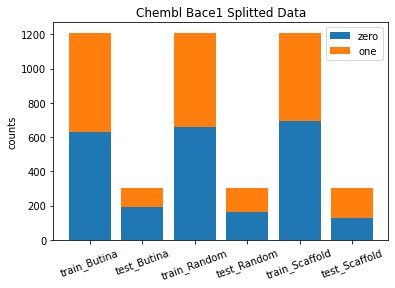

In [26]:
# data plotting: after split
test_Butina = pd.read_csv('chembl_bace1_test_ButinaSplitter.csv')
test_Random = pd.read_csv('chembl_bace1_test_RandomSplitter.csv')
test_Scaffold = pd.read_csv('chembl_bace1_test_ScaffoldSplitter.csv')
train_Butina = pd.read_csv('chembl_bace1_train_ButinaSplitter.csv')
train_Random = pd.read_csv('chembl_bace1_train_RandomSplitter.csv')
train_Scaffold = pd.read_csv('chembl_bace1_train_ScaffoldSplitter.csv')

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=20)

labels = ['train_Butina', 'test_Butina', 'train_Random', 'test_Random', 'train_Scaffold', 'test_Scaffold'] 
zero_Classification = [train_Butina['Classification'].value_counts()[0], test_Butina['Classification'].value_counts()[0], train_Random['Classification'].value_counts()[0], test_Random['Classification'].value_counts()[0], train_Scaffold['Classification'].value_counts()[0], test_Scaffold['Classification'].value_counts()[0]]
one_Classification = [train_Butina['Classification'].value_counts()[1], test_Butina['Classification'].value_counts()[1], train_Random['Classification'].value_counts()[1], test_Random['Classification'].value_counts()[1], train_Scaffold['Classification'].value_counts()[1], test_Scaffold['Classification'].value_counts()[1]]

ax.bar(labels, zero_class,label='zero')
ax.bar(labels, one_class, bottom=zero_class, label='one')

ax.set_ylabel('counts')
ax.set_title('Chembl Bace1 Splitted Data')
ax.legend()

plt.show()

# PART 3: Chembl ACH dataset

Text(0.5, 1.0, 'chembl_ach_Class')

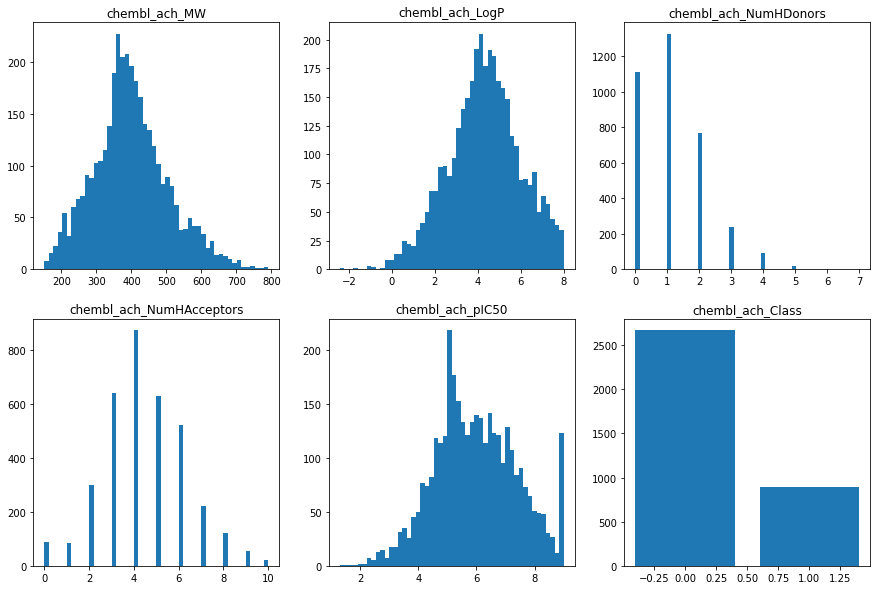

In [28]:
# data plotting: before split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import deepchem as dc

data = pd.read_csv('chembl_acetylcholinesterase_bioactivity_data_processed.csv')
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,3,1)
ax1.hist(data['MW'], bins=50)
plt.title('chembl_ach_MW')

ax1=fig.add_subplot(2,3,2)
ax1.hist(data['LogP'], bins=50)
plt.title('chembl_ach_LogP')

ax1=fig.add_subplot(2,3,3)
ax1.hist(data['NumHDonors'], bins=50)
plt.title('chembl_ach_NumHDonors')

ax1=fig.add_subplot(2,3,4)
ax1.hist(data['NumHAcceptors'], bins=50)
plt.title('chembl_ach_NumHAcceptors')

ax1=fig.add_subplot(2,3,5)
ax1.hist(data['pIC50'], bins=50)
plt.title('chembl_ach_pIC50')

ax1=fig.add_subplot(2,3,6)
counts = data['Classification'].value_counts()
ax1.bar(counts.index, counts.values)
plt.title('chembl_ach_Class')

In [32]:
import deepchem as dc
import pandas as pd
import os

# pandas read file
original_data = pd.read_csv('chembl_acetylcholinesterase_bioactivity_data_processed.csv')
#original_data_sub = original_data[['mol', 'CID', 'Class', 'pIC50']]
# deepchem read file
input_data='chembl_acetylcholinesterase_bioactivity_data_processed.csv'
tasks=['Classification']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, feature_field='canonical_smiles',featurizer=featurizer)
dataset=loader.create_dataset(input_data)
# splitters
randomSplitter = dc.splits.RandomSplitter()
scaffoldsplitter = dc.splits.ScaffoldSplitter()
butinaSplitter = dc.splits.ButinaSplitter()
splitters = [randomSplitter, scaffoldsplitter, butinaSplitter]
for splitter in splitters:
  # split data
  train_dataset, test_dataset = splitter.train_test_split(dataset)
  # train data get smiles
  train_dataset_df = train_dataset.to_dataframe()
  train_dataset_df_sub = train_dataset_df[['ids']]
  train_dataset_df_sub.columns = ['smiles']
  # train data merge
  merged_train_data = pd.merge(train_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_train_data.to_csv('chembl_ach_train_'+ str(splitter) + '.csv', index=False)
  # test data get smiles
  test_dataset_df = test_dataset.to_dataframe()
  test_dataset_df_sub = test_dataset_df[['ids']]
  test_dataset_df_sub.columns = ['smiles']
  # test data merge
  merged_test_data = pd.merge(test_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_test_data.to_csv('chembl_ach_test_'+ str(splitter) + '.csv', index=False)


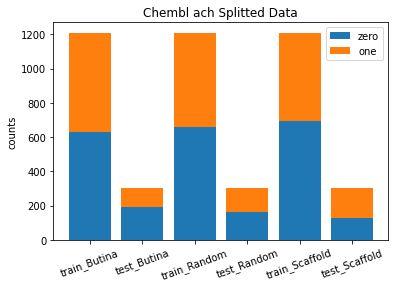

In [33]:
# data plotting: after split
test_Butina = pd.read_csv('chembl_ach_test_ButinaSplitter.csv')
test_Random = pd.read_csv('chembl_ach_test_RandomSplitter.csv')
test_Scaffold = pd.read_csv('chembl_ach_test_ScaffoldSplitter.csv')
train_Butina = pd.read_csv('chembl_ach_train_ButinaSplitter.csv')
train_Random = pd.read_csv('chembl_ach_train_RandomSplitter.csv')
train_Scaffold = pd.read_csv('chembl_ach_train_ScaffoldSplitter.csv')

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=20)

labels = ['train_Butina', 'test_Butina', 'train_Random', 'test_Random', 'train_Scaffold', 'test_Scaffold'] 
zero_Classification = [train_Butina['Classification'].value_counts()[0], test_Butina['Classification'].value_counts()[0], train_Random['Classification'].value_counts()[0], test_Random['Classification'].value_counts()[0], train_Scaffold['Classification'].value_counts()[0], test_Scaffold['Classification'].value_counts()[0]]
one_Classification = [train_Butina['Classification'].value_counts()[1], test_Butina['Classification'].value_counts()[1], train_Random['Classification'].value_counts()[1], test_Random['Classification'].value_counts()[1], train_Scaffold['Classification'].value_counts()[1], test_Scaffold['Classification'].value_counts()[1]]

ax.bar(labels, zero_class,label='zero')
ax.bar(labels, one_class, bottom=zero_class, label='one')

ax.set_ylabel('counts')
ax.set_title('Chembl ach Splitted Data')
ax.legend()

plt.show()

# PART 4: chembl CDK2 dataset

Text(0.5, 1.0, 'chembl_cdk2_Class')

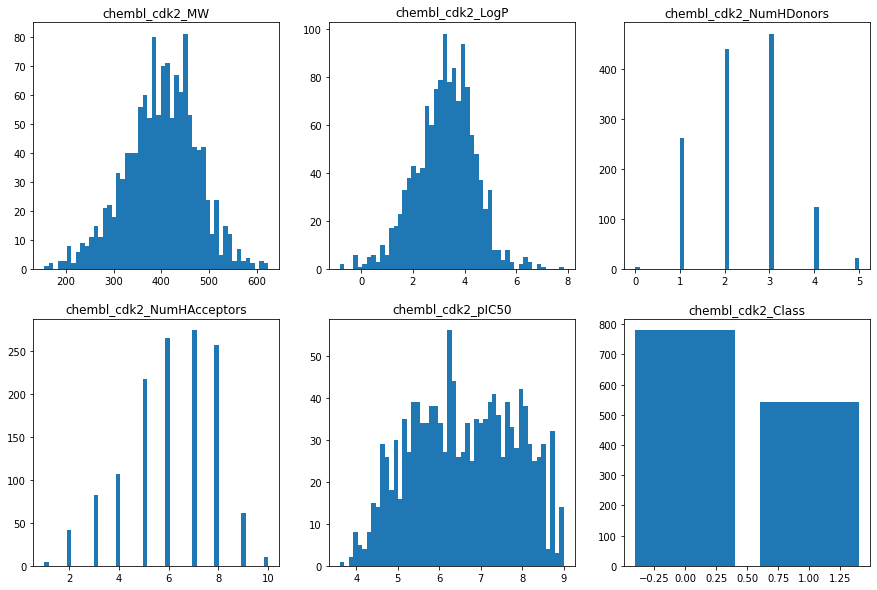

In [35]:
# data plotting: before split
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import deepchem as dc

data = pd.read_csv('chembl_cdk2_bioactivity_data_processed.csv')
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,3,1)
ax1.hist(data['MW'], bins=50)
plt.title('chembl_cdk2_MW')

ax1=fig.add_subplot(2,3,2)
ax1.hist(data['LogP'], bins=50)
plt.title('chembl_cdk2_LogP')

ax1=fig.add_subplot(2,3,3)
ax1.hist(data['NumHDonors'], bins=50)
plt.title('chembl_cdk2_NumHDonors')

ax1=fig.add_subplot(2,3,4)
ax1.hist(data['NumHAcceptors'], bins=50)
plt.title('chembl_cdk2_NumHAcceptors')

ax1=fig.add_subplot(2,3,5)
ax1.hist(data['pIC50'], bins=50)
plt.title('chembl_cdk2_pIC50')

ax1=fig.add_subplot(2,3,6)
counts = data['Classification'].value_counts()
ax1.bar(counts.index, counts.values)
plt.title('chembl_cdk2_Class')

In [36]:
import deepchem as dc
import pandas as pd
import os

# pandas read file
original_data = pd.read_csv('chembl_cdk2_bioactivity_data_processed.csv')
#original_data_sub = original_data[['mol', 'CID', 'Class', 'pIC50']]
# deepchem read file
input_data='chembl_cdk2_bioactivity_data_processed.csv'
tasks=['Classification']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, feature_field='canonical_smiles',featurizer=featurizer)
dataset=loader.create_dataset(input_data)
# splitters
randomSplitter = dc.splits.RandomSplitter()
scaffoldsplitter = dc.splits.ScaffoldSplitter()
butinaSplitter = dc.splits.ButinaSplitter()
splitters = [randomSplitter, scaffoldsplitter, butinaSplitter]
for splitter in splitters:
  # split data
  train_dataset, test_dataset = splitter.train_test_split(dataset)
  # train data get smiles
  train_dataset_df = train_dataset.to_dataframe()
  train_dataset_df_sub = train_dataset_df[['ids']]
  train_dataset_df_sub.columns = ['smiles']
  # train data merge
  merged_train_data = pd.merge(train_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_train_data.to_csv('chembl_cdk2_train_'+ str(splitter) + '.csv', index=False)
  # test data get smiles
  test_dataset_df = test_dataset.to_dataframe()
  test_dataset_df_sub = test_dataset_df[['ids']]
  test_dataset_df_sub.columns = ['smiles']
  # test data merge
  merged_test_data = pd.merge(test_dataset_df_sub, original_data, how='inner', left_on='smiles', right_on='canonical_smiles', left_index=False, right_index=False)
  merged_test_data.to_csv('chembl_cdk2_test_'+ str(splitter) + '.csv', index=False)


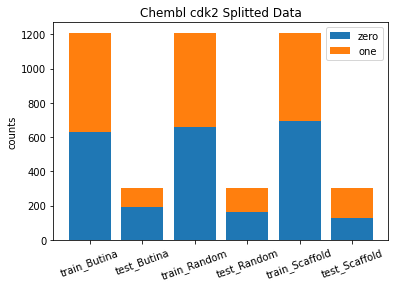

In [37]:
# data plotting: after split
test_Butina = pd.read_csv('chembl_cdk2_test_ButinaSplitter.csv')
test_Random = pd.read_csv('chembl_cdk2_test_RandomSplitter.csv')
test_Scaffold = pd.read_csv('chembl_cdk2_test_ScaffoldSplitter.csv')
train_Butina = pd.read_csv('chembl_cdk2_train_ButinaSplitter.csv')
train_Random = pd.read_csv('chembl_cdk2_train_RandomSplitter.csv')
train_Scaffold = pd.read_csv('chembl_cdk2_train_ScaffoldSplitter.csv')

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=20)

labels = ['train_Butina', 'test_Butina', 'train_Random', 'test_Random', 'train_Scaffold', 'test_Scaffold'] 
zero_Classification = [train_Butina['Classification'].value_counts()[0], test_Butina['Classification'].value_counts()[0], train_Random['Classification'].value_counts()[0], test_Random['Classification'].value_counts()[0], train_Scaffold['Classification'].value_counts()[0], test_Scaffold['Classification'].value_counts()[0]]
one_Classification = [train_Butina['Classification'].value_counts()[1], test_Butina['Classification'].value_counts()[1], train_Random['Classification'].value_counts()[1], test_Random['Classification'].value_counts()[1], train_Scaffold['Classification'].value_counts()[1], test_Scaffold['Classification'].value_counts()[1]]

ax.bar(labels, zero_class,label='zero')
ax.bar(labels, one_class, bottom=zero_class, label='one')

ax.set_ylabel('counts')
ax.set_title('Chembl cdk2 Splitted Data')
ax.legend()

plt.show()